In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from model_pipeline import ModelPipeline, train_test_split, get_train_val_indices
import experiment

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
all_df = pd.read_csv('data_folder/data/all_data.csv').set_index('date')
all_df

,nonfarm_payroll,payroll_delta_1m,payroll_delta_3m,payroll_delta_6m,payroll_delta_12m,payroll_diff_12m_1m,payroll_diff_12m_3m,payroll_diff_12m_6m,policy_rate,policy_rate_1m_ago,...,sp500,sp500_delta_1m,sp500_delta_3m,sp500_delta_6m,sp500_delta_12m,vol_30d,recession,recession_3m,recession_6m,recession_12m
date,,,,,,,,,,,,,,,,,,,,,
1939-01-01,29923.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.300000,-6.392695,-6.605922,-0.243307,15.060811,1.846643,NaN,NaN,NaN,NaN
1939-02-01,30100.0,0.591518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.700000,3.252029,-0.235662,5.306794,11.992942,1.868115,NaN,NaN,NaN,NaN
1939-03-01,30280.0,0.598007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.980000,-13.543309,-16.438362,-10.294120,29.176465,1.755651,NaN,NaN,NaN,NaN
1939-04-01,30094.0,-0.614267,0.571467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.930000,-0.455366,-11.138210,-17.008350,11.758697,1.988600,NaN,NaN,NaN,NaN
1939-05-01,30299.0,0.681199,0.661130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.600000,6.129918,-8.661413,-8.876663,25.134842,1.223243,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,149240.0,0.395555,1.297785,2.431056,4.732029,4.336475,3.434245,2.300973,0.08,0.08,...,4766.180176,4.361291,10.647380,10.905880,26.892739,1.112502,1.0,1.0,0.0,0.0
2022-01-01,149744.0,0.337711,1.174960,2.293236,4.703637,4.365926,3.528676,2.410400,0.08,0.08,...,4515.549805,-5.258517,-1.950547,2.736813,21.573991,1.122077,1.0,1.0,0.0,0.0
2022-02-01,150458.0,0.476814,1.214918,2.419267,4.683184,4.206370,3.468266,2.263917,0.08,0.08,...,4373.939941,-3.136049,-4.227284,-3.288763,14.766935,1.390119,1.0,0.0,0.0,0.0


# Run In Sample Experiments

### Logistic: including Ridge, Lasso & Elastic Net

In [5]:
# Define the model type & experiment directory where you want to save the experiment results
model_type = 'logistic'
data_dir = 'data_folder/data/all_data.csv'
exp_dir = f'data_folder/experiments_in_sample_new2'

In [6]:
# Features experiment for logistics model
experiment.features_experiment(model_type, data_dir, exp_dir)

Running Experiment 1:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 2:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 3:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 4:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 5:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 6:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_1

KeyboardInterrupt: 

### SVC

In [113]:
model_type = 'svc'
experiment.features_experiment(model_type, data_dir, exp_dir)

Running Experiment 1:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 2:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 3:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_1m', 'vol_30d']
Running Experiment 4:Y is recession_3m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 5:Y is recession_6m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
Running Experiment 6:Y is recession_12m, X are ['payroll_diff_12m_1m', 'policy_rate_delta_1m', 'CPI_delta_1m', 'yield_1

# Experiment Results

### Logistic

In [3]:
all_info_logistic, all_metrics_logistic = experiment.read_experiment_results('logistic', exp_dir)

In [7]:
rank_logistic = all_metrics_logistic.sort_values(by='f1_macro', ascending=False)
rank_logistic

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num
0,0.692689,0.690220,0.615151,0.663957,0.692689,0.690426,0.691639,0.694051,0.636364,0.690220,0.690220,0.690220,1984.0
0,0.692593,0.689824,0.613389,0.662144,0.692593,0.690075,0.691455,0.693182,0.633766,0.689824,0.689824,0.689824,1780.0
0,0.692593,0.689702,0.613520,0.661224,0.692593,0.689934,0.691352,0.694286,0.631169,0.689702,0.689702,0.689702,1132.0
0,0.692593,0.689580,0.613653,0.660300,0.692593,0.689789,0.691246,0.695402,0.628571,0.689580,0.689580,0.689580,1852.0
0,0.691358,0.688770,0.612020,0.662162,0.691358,0.689036,0.690363,0.690141,0.636364,0.688770,0.688770,0.688770,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.586207,0.583947,0.524177,0.553191,0.586207,0.583935,0.585525,0.566757,0.540260,0.583947,0.583947,0.583947,1683.0
0,0.585185,0.582912,0.523398,0.552000,0.585185,0.582897,0.584499,0.565574,0.539062,0.582912,0.582912,0.582912,1779.0
0,0.583951,0.581738,0.522567,0.551265,0.583951,0.581731,0.583311,0.564033,0.539062,0.581738,0.581738,0.581738,1734.0
0,0.582512,0.580307,0.521647,0.549801,0.582512,0.580296,0.581874,0.562500,0.537662,0.580307,0.580307,0.580307,1542.0


In [12]:
logistic_tops = list(rank_logistic['exp_num'].head(15))
logistic_tops

[1984.0,
 1780.0,
 1132.0,
 1852.0,
 1804.0,
 1708.0,
 1900.0,
 1792.0,
 1084.0,
 940.0,
 1936.0,
 1816.0,
 1924.0,
 1888.0,
 1768.0]

In [33]:
# Top logistic experiments:
for exp_num in logistic_tops:
    mask = all_info_logistic['exp_number'] == str(int(exp_num))
    feas = all_info_logistic.loc[mask, 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')
    y = all_info_logistic.loc[mask, 'y_variable'][0]
    print(f'For exp {exp_num}:')
    print(f'Y is {y} & Features are: {feas}')
    print(" ")
    sub_df = all_df[feas + [y]].copy().dropna().reset_index()

    fold_indices = get_train_val_indices(sub_df, lag=5, recession_period='3m')

For exp 1984.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_6m', 'CPI_delta_3m', 'yield_10y_delta3m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1780.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1132.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_3m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1852.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_6m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1804.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1708.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_de

### SVC

In [21]:
all_info_svc, all_metrics_svc = experiment.read_experiment_results('svc', exp_dir)

In [22]:
rank_svc = all_metrics_svc.sort_values(by='f1_macro', ascending=False)
rank_svc

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num
0,0.907063,0.904875,0.876317,0.897959,0.907063,0.906317,0.906701,0.942857,0.857143,0.904875,0.904875,0.904875,574.0
0,0.907063,0.904875,0.876317,0.897959,0.907063,0.906317,0.906701,0.942857,0.857143,0.904875,0.904875,0.904875,1342.0
0,0.903870,0.901903,0.872682,0.894952,0.903870,0.903172,0.903511,0.939828,0.854167,0.901903,0.901903,0.901903,754.0
0,0.902622,0.901117,0.866711,0.894879,0.902622,0.902091,0.902388,0.927374,0.864583,0.901117,0.901117,0.901117,1534.0
0,0.902107,0.899794,0.869968,0.892224,0.902107,0.901276,0.901692,0.939655,0.849351,0.899794,0.899794,0.899794,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.490706,0.489121,0.471780,0.459921,0.490706,0.489046,0.490382,0.465426,0.454545,0.489121,0.489121,0.489121,445.0
0,0.483951,0.482688,0.465771,0.457143,0.483951,0.482689,0.484014,0.455959,0.458333,0.482688,0.482688,0.482688,1896.0
0,0.483990,0.481776,0.465430,0.446499,0.483990,0.481612,0.483428,0.454301,0.438961,0.481776,0.481776,0.481776,882.0
0,0.481527,0.479689,0.464474,0.448231,0.481527,0.479632,0.481256,0.452381,0.444156,0.479689,0.479689,0.479689,1722.0


In [25]:
svc_tops = list(rank_svc['exp_num'].head(15))
svc_tops

[574.0,
 1342.0,
 754.0,
 1534.0,
 550.0,
 766.0,
 1318.0,
 526.0,
 1462.0,
 742.0,
 2086.0,
 1510.0,
 694.0,
 514.0,
 2290.0]

In [37]:
# Top SVC experiments:
for exp_num in svc_tops:
    mask = all_info_svc['exp_number'] == str(int(exp_num))
    feas = all_info_svc.loc[mask, 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')
    y = all_info_svc.loc[mask, 'y_variable'][0]
    print(f'For exp {exp_num}:')
    print(f'Y is {y} & Features are: {feas}')
    print(" ")
    sub_df = all_df[feas + [y]].copy().dropna().reset_index()

    fold_indices = get_train_val_indices(sub_df, lag=5, recession_period='3m')

For exp 574.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1342.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 754.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1534.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 550.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta3m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 766.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'poli

# Run Out sample performance
- We will run the out sample performance result for the top 15 features

In [42]:
# Logistic
out_sample_experiment_dir = 'data_folder/experiments_out_sample_new'
experiment.out_sample_nested_experiments(model_type='logistic',
                                         exp_list=logistic_tops,
                                         insample_exp_dir=exp_dir,
                                         outsample_exp_dir=out_sample_experiment_dir)

For exp 1984.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_6m', 'CPI_delta_3m', 'yield_10y_delta3m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1780.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta1m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1132.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_3m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1852.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_6m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1804.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_delta_3m', 'CPI_delta_3m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_3m', 'vol_30d']
 
For exp 1708.0:
Y is recession_3m & Features are: ['payroll_diff_12m_6m', 'policy_rate_de

In [51]:
# SVC
out_sample_experiment_dir = 'data_folder/experiments_out_sample_new'
experiment.out_sample_nested_experiments(model_type='svc',
                                         exp_list=svc_tops,
                                         insample_exp_dir=exp_dir,
                                         outsample_exp_dir=out_sample_experiment_dir)

For exp 574.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1342.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 754.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta6m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 1534.0:
Y is recession_3m & Features are: ['payroll_diff_12m_3m', 'policy_rate_delta_12m', 'CPI_delta_12m', 'yield_10y_delta12m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 550.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'policy_rate_delta_6m', 'CPI_delta_12m', 'yield_10y_delta3m', 'yield_spread', 'sp500_delta_12m', 'vol_30d']
 
For exp 766.0:
Y is recession_3m & Features are: ['payroll_diff_12m_1m', 'poli

## Read Out Sample Results

In [52]:
all_info_log, all_metrics_log = experiment.read_out_sample_results('logistic',
                                                                   logistic_tops,
                                                                   out_sample_experiment_dir)

In [54]:
all_info_svc, all_metrics_svc = experiment.read_out_sample_results('svc',
                                                                   svc_tops,
                                                                   out_sample_experiment_dir)

### logistic

In [56]:
# For each experiment, data is split into 5 folds, show the average performance of 5 folds
all_metrics_log.groupby(['exp_num']).mean().sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,fold_num
exp_num,,,,,,,,,,,,,
1936.0,0.608259,0.617037,0.553431,0.541506,0.608259,0.588121,0.590452,0.642981,0.556040,0.617037,0.617037,0.617037,2.0
1768.0,0.603704,0.614660,0.551348,0.537825,0.603704,0.586574,0.587517,0.632873,0.546508,0.614660,0.614660,0.614660,2.0
1804.0,0.601235,0.612344,0.550829,0.532730,0.601235,0.585591,0.586527,0.638320,0.526422,0.612344,0.612344,0.612344,2.0
1924.0,0.604547,0.612881,0.549955,0.538591,0.604547,0.583406,0.585903,0.636796,0.558218,0.612881,0.612881,0.612881,2.0
1792.0,0.601235,0.614079,0.552000,0.528806,0.601235,0.582881,0.583030,0.644334,0.531159,0.614079,0.614079,0.614079,2.0
1708.0,0.599523,0.612082,0.555319,0.518243,0.599523,0.579037,0.579019,0.654932,0.507609,0.612082,0.612082,0.612082,2.0
1780.0,0.596296,0.608690,0.546750,0.522668,0.596296,0.577777,0.578156,0.630981,0.526224,0.608690,0.608690,0.608690,2.0
1888.0,0.595062,0.607223,0.549377,0.517401,0.595062,0.576691,0.577024,0.649672,0.503777,0.607223,0.607223,0.607223,2.0
1816.0,0.595062,0.606249,0.544462,0.522059,0.595062,0.576259,0.577122,0.627221,0.527283,0.606249,0.606249,0.606249,2.0


### SVC

In [58]:
# For each experiment, data is split into 5 folds, show the average performance of 5 folds
all_metrics_svc.groupby(['exp_num']).mean().sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,fold_num
exp_num,,,,,,,,,,,,,
2086.0,0.613297,0.611988,0.548836,0.534487,0.613297,0.582835,0.589473,0.602212,0.553461,0.611988,0.611988,0.611988,2.0
1342.0,0.610827,0.604266,0.544996,0.526585,0.610827,0.577223,0.585990,0.625410,0.516807,0.604266,0.604266,0.604266,2.0
526.0,0.600797,0.597641,0.542930,0.499042,0.600797,0.576667,0.583704,0.582820,0.472622,0.597641,0.597641,0.597641,2.0
2290.0,0.594169,0.590184,0.535123,0.513545,0.594169,0.572748,0.581245,0.589378,0.490126,0.590184,0.590184,0.590184,2.0
754.0,0.589224,0.582953,0.530389,0.504608,0.589224,0.566770,0.575971,0.585571,0.474663,0.582953,0.582953,0.582953,2.0
1510.0,0.589224,0.591184,0.535546,0.500408,0.589224,0.563230,0.569341,0.576765,0.500866,0.591184,0.591184,0.591184,2.0
1318.0,0.598351,0.593440,0.535192,0.485753,0.598351,0.562006,0.569695,0.578415,0.488359,0.593440,0.593440,0.593440,2.0
574.0,0.594640,0.587181,0.533849,0.480865,0.594640,0.558959,0.567792,0.584116,0.467530,0.587181,0.587181,0.587181,2.0
1534.0,0.575427,0.570700,0.531913,0.492516,0.575427,0.550045,0.558545,0.577884,0.466399,0.570700,0.570700,0.570700,2.0


Best Features -- select two experiments for each type of model
- Logistic: 1936, 1768
- SVC: 2086, 1342

Get the best fold

In [67]:
# exp 1936.0, best fold is 3
all_metrics_log.loc[all_metrics_log['exp_num']==1936.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.691358,0.687882,0.653497,0.719101,0.691358,0.688318,0.690218,0.695652,0.744186,0.687882,0.687882,0.687882,1936.0,3.0
0,0.660494,0.655691,0.621346,0.699454,0.660494,0.654691,0.656902,0.653061,0.752941,0.655691,0.655691,0.655691,1936.0,4.0
0,0.565217,0.563735,0.536594,0.426230,0.565217,0.538115,0.538810,0.619048,0.325000,0.563735,0.563735,0.563735,1936.0,0.0
0,0.534161,0.585517,0.373938,0.509804,0.534161,0.533008,0.540935,0.390000,0.735849,0.585517,0.585517,0.585517,1936.0,1.0
0,0.590062,0.592361,0.581781,0.352941,0.590062,0.526471,0.525393,0.857143,0.222222,0.592361,0.592361,0.592361,1936.0,2.0


In [68]:
# exp 1882, best fold is 4
all_metrics_log.loc[all_metrics_log['exp_num']==1768.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.716049,0.713522,0.669675,0.738636,0.716049,0.713913,0.715134,0.714286,0.764706,0.713522,0.713522,0.713522,1768.0,4.0
0,0.635802,0.634818,0.596020,0.654971,0.635802,0.634675,0.635176,0.636364,0.674699,0.634818,0.634818,0.634818,1768.0,3.0
0,0.598765,0.603049,0.591665,0.392523,0.598765,0.546492,0.544591,0.840000,0.256098,0.603049,0.603049,0.603049,1768.0,2.0
0,0.524691,0.578704,0.374086,0.509554,0.524691,0.524238,0.529133,0.388350,0.740741,0.578704,0.578704,0.578704,1768.0,1.0
0,0.543210,0.543210,0.525294,0.393443,0.543210,0.513553,0.513553,0.585366,0.296296,0.543210,0.543210,0.543210,1768.0,0.0


In [70]:
# exp 2086, best fold is 4
all_metrics_svc.loc[all_metrics_svc['exp_num']==2086.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.679012,0.680672,0.647370,0.679012,0.679012,0.679012,0.679012,0.714286,0.647059,0.680672,0.680672,0.680672,2086.0,4.0
0,0.658385,0.657716,0.607729,0.615385,0.658385,0.654061,0.654301,0.698413,0.550000,0.657716,0.657716,0.657716,2086.0,0.0
0,0.602484,0.607617,0.391070,0.507692,0.602484,0.587179,0.614333,0.428571,0.622642,0.607617,0.607617,0.607617,2086.0,1.0
0,0.617284,0.602050,0.588158,0.701923,0.617284,0.583720,0.591017,0.598361,0.848837,0.602050,0.602050,0.602050,2086.0,3.0
0,0.509317,0.511883,0.509854,0.168421,0.509317,0.410202,0.408700,0.571429,0.098765,0.511883,0.511883,0.511883,2086.0,2.0


In [71]:
# exp 1342, best fold is 4
all_metrics_svc.loc[all_metrics_svc['exp_num']==1342.0].sort_values('f1_macro', ascending=False)

Unnamed: 0,accuracy,balanced_accuracy,average_precision,f1_binary,f1_micro,f1_macro,f1_weighted,precision,recall,roc_auc_micro,roc_auc_macro,roc_auc_weighted,exp_num,fold_num
0,0.679012,0.683728,0.655031,0.657895,0.679012,0.677785,0.676802,0.746269,0.588235,0.683728,0.683728,0.683728,1342.0,4.0
0,0.639752,0.620982,0.404105,0.508475,0.639752,0.612080,0.647474,0.461538,0.566038,0.620982,0.620982,0.620982,1342.0,1.0
0,0.604938,0.585832,0.577842,0.706422,0.604938,0.551324,0.560898,0.583333,0.895349,0.585832,0.585832,0.585832,1342.0,3.0
0,0.559006,0.557330,0.532753,0.393162,0.559006,0.523410,0.524219,0.621622,0.287500,0.557330,0.557330,0.557330,1342.0,0.0
0,0.571429,0.573457,0.555249,0.366972,0.571429,0.521514,0.520555,0.714286,0.246914,0.573457,0.573457,0.573457,1342.0,2.0


Logistic model:
- For exp #1936, the best fold out-sample performance is fold 3; all 5 fold f1macro scores range from 52.6% - 68.8%
- For exp #1768, the best fold out-sample performance is fold 4; all 5 fold f1macro scores range from 51.4% - 71.4%
- The average f1-macro for all 5 fold of experiment #1936 is higher than experiment #1768, but #1768 has a higher variance in the out-sample performance.
- For logistic model, it's hard to tell which model is better, we will plot the predicted probability to compare the model performance

SVC model:
- For exp #2086, the best fold out-sample performance is fold 4; all 5 fold f1macro scores range from 41% - 67.9%
- For exp #1342, the best fold out-sample performance is fold 4; all 5 fold f1macro scores range from 52% - 67.8%
- Although the average f1-macro for all 5 fold of experiment #2086 is higher than experiment #1342, the generalization of experiment 2086 is worse than 1342, since one fold in #2086 f1macro score is <50%, this experiment (set of features) does not do well in generalization
- For SVC model, the features in experiment #1342 is better, and fold 4 model has the best performance.


## Read Model & Fit all data

In [94]:
clf_dict = {}
for exp_num in [1936.0, 1768.0, 2086.0, 1342.0]:

    if exp_num == 1936.0:
        fold_num = 3
        model_type = 'logistic'
        feas = all_info_log.loc[all_info_log['exp_number']=='1936.0', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 1768.0:
        fold_num = 4
        model_type = 'logistic'
        feas = all_info_log.loc[all_info_log['exp_number']=='1768.0', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 2086.0:
        fold_num = 4
        model_type = 'svc'
        feas = all_info_svc.loc[all_info_svc['exp_number']=='2086.0', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    elif exp_num == 1342.0:
        fold_num = 4
        model_type = 'svc'
        feas = all_info_svc.loc[all_info_svc['exp_number']=='1342.0', 'features'][0].replace('[','').replace(']', '').replace(' ', '').replace("'", '').split(',')

    fold_path = f'data_folder/experiments_out_sample_new/{model_type}/exp_{exp_num}/fold_{fold_num}'
    filename = f'{fold_path}/model.pkl'

    with open(filename, 'rb') as f:
        clf = pickle.load(f)
        clf_dict[exp_num] = {'model': clf,
                             'features': feas}


In [95]:
clf_dict

{1936.0: {'model': <model_pipeline.ModelPipeline at 0x7fd37e0910d0>,
  'features': ['payroll_diff_12m_6m',
   'policy_rate_delta_6m',
   'CPI_delta_1m',
   'yield_10y_delta3m',
   'yield_spread',
   'sp500_delta_3m',
   'vol_30d']},
 1768.0: {'model': <model_pipeline.ModelPipeline at 0x7fd37dbc1dd0>,
  'features': ['payroll_diff_12m_6m',
   'policy_rate_delta_3m',
   'CPI_delta_1m',
   'yield_10y_delta12m',
   'yield_spread',
   'sp500_delta_3m',
   'vol_30d']},
 2086.0: {'model': <model_pipeline.ModelPipeline at 0x7fd37e08d810>,
  'features': ['payroll_diff_12m_6m',
   'policy_rate_delta_6m',
   'CPI_delta_12m',
   'yield_10y_delta3m',
   'yield_spread',
   'sp500_delta_12m',
   'vol_30d']},
 1342.0: {'model': <model_pipeline.ModelPipeline at 0x7fd37e0a3190>,
  'features': ['payroll_diff_12m_3m',
   'policy_rate_delta_6m',
   'CPI_delta_12m',
   'yield_10y_delta12m',
   'yield_spread',
   'sp500_delta_12m',
   'vol_30d']}}

In [96]:
def get_prediction(clf_dict, exp_num):
    model = clf_dict[exp_num]['model']
    features = clf_dict[exp_num]['features']
    sub_df = all_df[features + ['recession', 'recession_3m']].copy().dropna()

    y_data = model.get_prediction(sub_df[features], sub_df[['recession', 'recession_3m']]).reset_index()
    y_data['date'] = pd.to_datetime(y_data['date'])
    return features, sub_df, y_data, model

### Predict using Models

Model Logistic - 1936 & 1768

In [90]:
features, sub_df, y_data, model = get_prediction(clf_dict, 1936.0)
features2, sub_df2, y_data2, model2 = get_prediction(clf_dict, 1768.0)

/Users/kaylee/PycharmProjects/frtlab-recession-prediction/model_pipeline.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data['y_pred'] = y_pred
/Users/kaylee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/kaylee/PycharmProjects/frtlab-recession-prediction/model_pipeline.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Model SVC - 2086 & 1342

In [97]:
features3, sub_df3, y_data3, model3 = get_prediction(clf_dict, 2086.0)
features4, sub_df4, y_data4, model4 = get_prediction(clf_dict, 1342.0)

/Users/kaylee/PycharmProjects/frtlab-recession-prediction/model_pipeline.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_data['y_pred'] = y_pred
/Users/kaylee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Users/kaylee/PycharmProjects/frtlab-recession-prediction/model_pipeline.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

# Plot the predicted probability of each model

### Compare two Logistic model

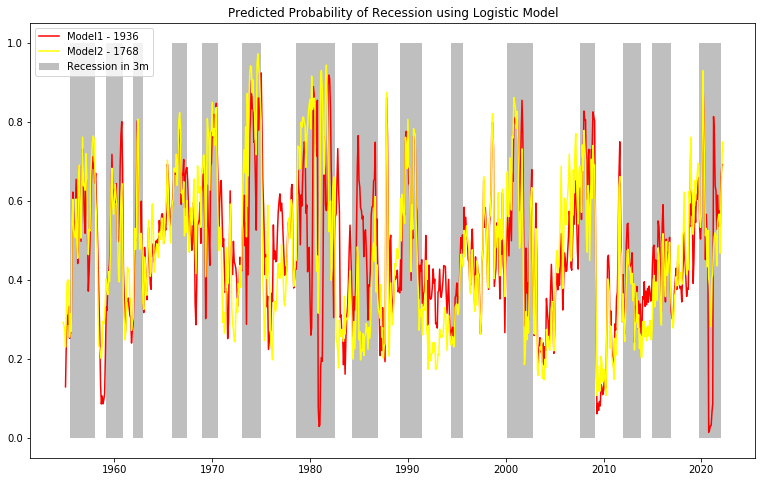

In [101]:
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='Recession in 3m')

plt.plot(y_data['date'], y_data['prob_1'], color='red', label='Model1 - 1936')
plt.plot(y_data2['date'], y_data2['prob_1'], color='yellow', label='Model2 - 1768')

plt.title("Predicted Probability of Recession using Logistic Model")
plt.legend()
plt.show()

From the comparison plot, we can see that compares to model2, model1 gives a higher probability to recession and gives a lower probability when there is no recession in general. So Model 1 is better than Model 2.

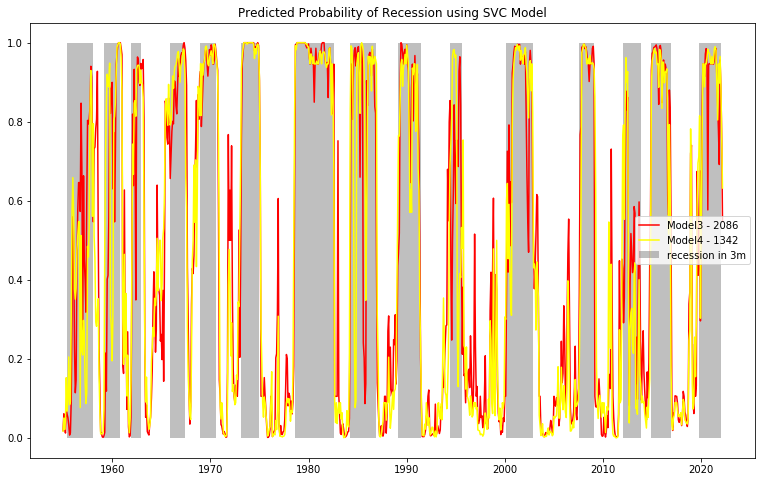

In [100]:
# Compare the predicted probability of Logistic & SVC
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='recession in 3m')
plt.plot(y_data3['date'], y_data3['prob_1'], color='red', label='Model3 - 2086')
plt.plot(y_data4['date'], y_data4['prob_1'], color='yellow', label='Model4 - 1342')
plt.title("Predicted Probability of Recession using SVC Model")

plt.legend()
plt.show()

From the comparison plot, we can see that compares to model3, model4 gives a higher probability to recession and gives a lower probability when there is no recession in general. So Model 4 is better than Model 3. This is consisten conclusion with our earlier metrics performance analysis.

## Compare Model 1 & Model 4

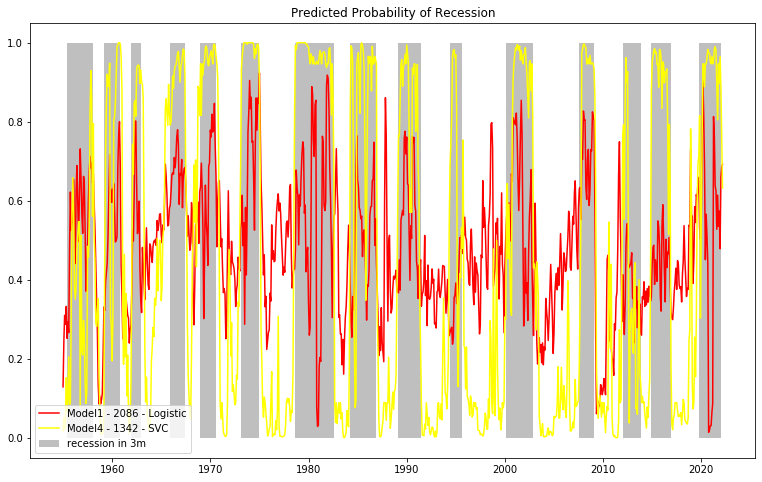

In [103]:
# Compare the predicted probability of Logistic & SVC
plt.figure(figsize=(13, 8))
plt.fill_between(y_data['date'], 0, 1, where=y_data['recession_3m']==1, facecolor='grey', alpha=0.5, label='recession in 3m')
plt.plot(y_data['date'], y_data['prob_1'], color='red', label='Model1 - 2086 - Logistic')
plt.plot(y_data4['date'], y_data4['prob_1'], color='yellow', label='Model4 - 1342 - SVC')
plt.title("Predicted Probability of Recession")

plt.legend()
plt.show()

- From this plot we see that the SVC model does a better job in predicting recession probability

### Show the best model features

In [105]:
clf_dict[1342.0]['features']

['payroll_diff_12m_3m',
 'policy_rate_delta_6m',
 'CPI_delta_12m',
 'yield_10y_delta12m',
 'yield_spread',
 'sp500_delta_12m',
 'vol_30d']

### Show the best model parameters

In [110]:
best_model = clf_dict[1342.0]['model'].pipeline
best_model.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('classifier',
   SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
       max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
       verbose=False))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'classifier': SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__C': 2.8,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_s